In [10]:
import xarray as xr
ds = xr.open_dataset('/home/scratch/fa23nwp/wrfout_d01_0001-01-01_00:00:00')
ds = ds.rename({'Time': 'time'})
ds.time.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


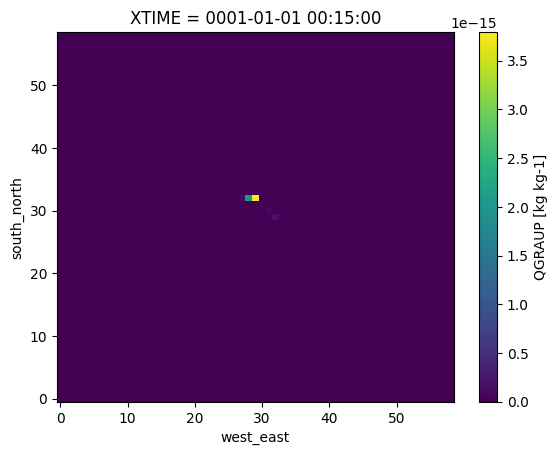

In [2]:
ds.QGRAUP.sel(bottom_top=0).sel(time=3).plot()

In [3]:
from xmovie import Movie
mov = Movie(ds.T.sel(bottom_top=0).sel(time=slice(1,22)))
mov.save('movie.gif',progress=True, framerate=5, gif_framerate=5,overwrite_existing=True)

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xmovie/core.py:46: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  warnings.warn(
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


  0%|          | 0/21 [00:00<?, ?it/s]

Movie created at movie.mp4
GIF created at movie.gif


In [4]:
from IPython.display import Image
Image(url='movie.gif')

In [5]:
from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES

ncfile = Dataset('/home/scratch/fa23nwp/wrfout_d01_0001-01-01_00:00:00')

# Get the 3D CAPE, which contains missing values
dbz= getvar(ncfile, "dbz", timeidx=ALL_TIMES)
dbz.isel(Time=13).sel(bottom_top=0).plot(vmin=0, vmax=55)

In [11]:
from xmovie import Movie

from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset
ds = Dataset('/home/scratch/fa23nwp/wrfout_d01_0001-01-01_00:00:00')
dbz= getvar(ds, "dbz", timeidx=ALL_TIMES)
dbz = dbz.rename({'Time': 'time'})
mov = Movie(dbz.isel(time=slice(0,24)).sel(bottom_top=0))
mov.save('movie.gif',progress=True, framerate=5, gif_framerate=5,overwrite_existing=True)

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xmovie/core.py:46: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  warnings.warn(
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(


  0%|          | 0/24 [00:00<?, ?it/s]

Movie created at movie.mp4
GIF created at movie.gif


In [7]:
from IPython.display import Image
Image(url='movie.gif')

https://wrf-python.readthedocs.io/en/latest/user_api/generated/wrf.getvar.html#wrf.getvar

In [16]:
from wrf import getvar
from netCDF4 import Dataset

ncfile = Dataset("/home/scratch/fa23nwp/wrfout_d01_0001-01-01_00:00:00")

# Get the Sea Level Pressure
uphc = getvar(ncfile, "updraft_helicity", timeidx=ALL_TIMES)

uphc_ds=uphc.rename({'Time': 'time'})
mov = Movie(uphc_ds)
mov.save('movie2.gif', progress=True, framerate=5, gif_framerate=5, overwrite_existing=True)



/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xmovie/core.py:46: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  warnings.warn(
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(


  0%|          | 0/25 [00:00<?, ?it/s]

Movie created at movie2.mp4
GIF created at movie2.gif


In [17]:
from IPython.display import Image
Image(url='movie2.gif')